In [1]:
import sys, os
if 'google.colab' in sys.modules and not os.path.exists('.setup_complete'):
    !wget -q https://raw.githubusercontent.com/yandexdataschool/Practical_RL/master/setup_colab.sh -O- | bash
    !touch .setup_complete

# This code creates a virtual display to draw game images on.
# It will have no effect if your machine has a monitor.
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY")) == 0:
    !bash ../xvfb start
    os.environ['DISPLAY'] = ':1'

<3>WSL (10) ERROR: CreateProcessParseCommon:708: Failed to translate d:\2_sem\rl\RL_LABS\l1
<3>WSL (10) ERROR: CreateProcessParseCommon:754: getpwuid(0) failed 2
<3>WSL (10) ERROR: UtilTranslatePathList:2866: Failed to translate c:\Users\PC\.conda\envs\my_gym_env
<3>WSL (10) ERROR: UtilTranslatePathList:2866: Failed to translate C:\Users\PC\.conda\envs\my_gym_env
<3>WSL (10) ERROR: UtilTranslatePathList:2866: Failed to translate C:\Users\PC\.conda\envs\my_gym_env\Library\mingw-w64\bin
<3>WSL (10) ERROR: UtilTranslatePathList:2866: Failed to translate C:\Users\PC\.conda\envs\my_gym_env\Library\usr\bin
<3>WSL (10) ERROR: UtilTranslatePathList:2866: Failed to translate C:\Users\PC\.conda\envs\my_gym_env\Library\bin
<3>WSL (10) ERROR: UtilTranslatePathList:2866: Failed to translate C:\Users\PC\.conda\envs\my_gym_env\Scripts
<3>WSL (10) ERROR: UtilTranslatePathList:2866: Failed to translate C:\Users\PC\.conda\envs\my_gym_env\bin
<3>WSL (10) ERROR: UtilTranslatePathList:2866: Failed to trans

In [2]:
import gymnasium as gym
import numpy as np
import random
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline

In [3]:
env = gym.make("FrozenLake-v1", is_slippery=True, render_mode="rgb_array")

state_size = env.observation_space.n
action_size = env.action_space.n

In [4]:
def q_table_init(state_size, action_size):
    q_table = np.zeros((state_size, action_size))
    
    return q_table

In [5]:
def choose_action(q_table, state, epsilon):

    if np.random.uniform(0, 1) < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(q_table[state])

    return action

In [6]:
def get_new_q_value(q_table, state, action, reward, next_state, gamma):
    current_q = q_table[state, action]
    max_future_q = np.max(q_table[next_state])
    new_q_value = (1 - alpha) * current_q + alpha * (reward + gamma * max_future_q)

    return new_q_value

In [7]:
def get_new_epsilon(epsilon, min_epsilon):
    new_epsilon = new_epsilon = max(epsilon * epsilon_decay, min_epsilon)

    return new_epsilon

In [8]:
Q_table = q_table_init(state_size, action_size)


alpha = 0.1  
gamma = 0.99  
epsilon = 1.0  
epsilon_decay = 0.995  
min_epsilon = 0.01  

episodes = 4000  
max_steps = 100  

rewards = []

Эпизод: 200, средняя награда: 0.01, epsilon: 0.367
Эпизод: 400, средняя награда: 0.06, epsilon: 0.135
Эпизод: 600, средняя награда: 0.165, epsilon: 0.049
Эпизод: 800, средняя награда: 0.21, epsilon: 0.018
Эпизод: 1000, средняя награда: 0.245, epsilon: 0.010
Эпизод: 1200, средняя награда: 0.29, epsilon: 0.010
Эпизод: 1400, средняя награда: 0.215, epsilon: 0.010
Эпизод: 1600, средняя награда: 0.42, epsilon: 0.010
Эпизод: 1800, средняя награда: 0.59, epsilon: 0.010
Эпизод: 2000, средняя награда: 0.53, epsilon: 0.010
Эпизод: 2200, средняя награда: 0.63, epsilon: 0.010
Эпизод: 2400, средняя награда: 0.59, epsilon: 0.010
Эпизод: 2600, средняя награда: 0.62, epsilon: 0.010
Эпизод: 2800, средняя награда: 0.55, epsilon: 0.010
Эпизод: 3000, средняя награда: 0.58, epsilon: 0.010
Эпизод: 3200, средняя награда: 0.585, epsilon: 0.010
Эпизод: 3400, средняя награда: 0.58, epsilon: 0.010
Эпизод: 3600, средняя награда: 0.61, epsilon: 0.010
Эпизод: 3800, средняя награда: 0.615, epsilon: 0.010
Эпизод: 400

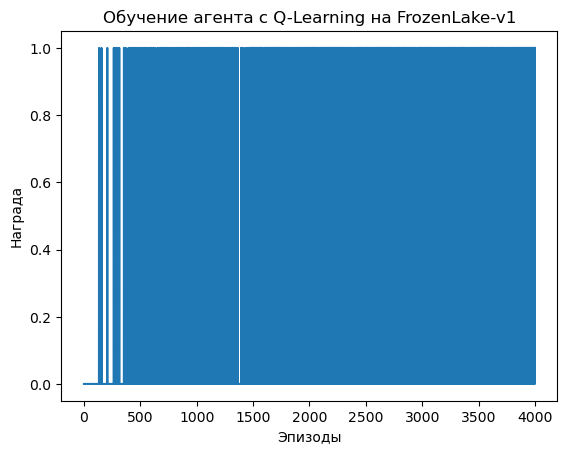

In [9]:
for episode in range(episodes):
    state = env.reset()[0]
    total_reward = 0
    for step in range(max_steps):
        action = choose_action(Q_table, state, epsilon)

        next_state, reward, done, _, _ = env.step(action)

        Q_table[state, action] = get_new_q_value(Q_table, state, action, reward, next_state, gamma)

        total_reward += reward
        state = next_state

        if done:
            break

    epsilon = get_new_epsilon(epsilon, min_epsilon)
    rewards.append(total_reward)

    if (episode + 1) % 200 == 0:
        print(f"Эпизод: {episode + 1}, средняя награда: {np.mean(rewards[-200:])}, epsilon: {epsilon:.3f}")

plt.plot(range(episodes), rewards)
plt.xlabel("Эпизоды")
plt.ylabel("Награда")
plt.title("Обучение агента с Q-Learning на FrozenLake-v1")
plt.show()

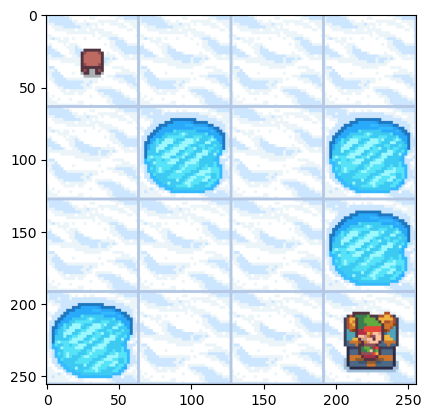

In [10]:
display.clear_output(wait=True)
state = env.reset()[0]
done = False
total_reward = 0
print(f"Эпизод {episode + 1}:")
while not done:
    action = np.argmax(Q_table[state]) 
    state, reward, done, _, _ = env.step(action)
    total_reward += reward
    plt.imshow(env.render())

    display.display(plt.gcf())
    display.clear_output(wait=True)